In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../data/kaggle_4th/train.csv')
test = pd.read_csv('../data/kaggle_4th/test.csv')
sub = pd.read_csv('../data/kaggle_4th/sample_submission.csv')

train.shape, test.shape, sub.shape

((26049, 16), (6512, 15), (6512, 2))

In [3]:
y = train['income']
test['income'] = 'blank'

In [4]:
train.shape, test.shape

((26049, 16), (6512, 16))

In [5]:
all_dat = pd.concat([train, test], axis=0)
all_dat.shape

(32561, 16)

In [6]:
all_dat['income'].value_counts()

<=50K    19744
blank     6512
>50K      6305
Name: income, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

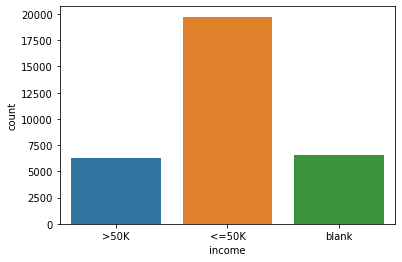

In [7]:
sns.countplot(x='income', data=all_dat)

In [8]:
all_dat.loc[all_dat['income'] == '>50K', 'target'] = 1
all_dat.loc[all_dat['income'] == '<=50K', 'target'] = 0
all_dat.loc[all_dat['income'] == 'blank', 'target'] = 999
all_dat['target'] = all_dat['target'].astype('int')
all_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 6511
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   fnlwgt          32561 non-null  int64 
 4   education       32561 non-null  object
 5   education_num   32561 non-null  int64 
 6   marital_status  32561 non-null  object
 7   occupation      32561 non-null  object
 8   relationship    32561 non-null  object
 9   race            32561 non-null  object
 10  sex             32561 non-null  object
 11  capital_gain    32561 non-null  int64 
 12  capital_loss    32561 non-null  int64 
 13  hours_per_week  32561 non-null  int64 
 14  native_country  32561 non-null  object
 15  income          32561 non-null  object
 16  target          32561 non-null  int32 
dtypes: int32(1), int64(7), object(9)
memory usage: 5.6+

In [9]:
all_dat.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,target
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K,1
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K,0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K,0


In [10]:
sel_cat = [
    'workclass', 'education', 'marital_status',
    'occupation', 'relationship', 'race', 
    'sex', 'native_country'
]

X_cat = all_dat[sel_cat]
y = all_dat['target']

In [11]:
X_dummy = pd.get_dummies(X_cat)
X_dummy

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6508,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6509,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6510,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
all_dat_n = pd.concat([all_dat, X_dummy], axis=1)
all_dat_n

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,...,0,0,0,0,0,0,0,1,0,0
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,...,0,0,0,0,0,0,0,1,0,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,...,0,0,0,0,0,0,0,1,0,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,...,0,0,0,0,0,0,0,1,0,0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,6507,35,Private,61343,Bachelors,13,Married-civ-spouse,Sales,Husband,White,...,0,0,0,0,0,0,0,1,0,0
6508,6508,41,Self-emp-inc,32185,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,...,0,0,0,0,0,0,0,1,0,0
6509,6509,39,Private,409189,5th-6th,3,Married-civ-spouse,Other-service,Husband,White,...,0,0,0,0,0,0,0,0,0,0
6510,6510,35,Private,180342,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,...,0,0,0,0,0,0,0,1,0,0


In [13]:
sel_cat = [
    'workclass', 'education', 'marital_status',
    'occupation', 'relationship', 'race', 
    'sex', 'native_country', 'income'
]

all_dat_n = all_dat_n.drop(sel_cat, axis=1)

In [14]:
all_dat_n

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,target,workclass_?,workclass_Federal-gov,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0,40,168538,9,0,0,60,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,17,101626,5,0,0,20,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,18,353358,10,0,0,16,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,21,151158,10,0,0,25,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,24,122234,10,0,0,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,6507,35,61343,13,0,0,40,999,0,0,...,0,0,0,0,0,0,0,1,0,0
6508,6508,41,32185,13,0,0,40,999,0,0,...,0,0,0,0,0,0,0,1,0,0
6509,6509,39,409189,3,0,0,40,999,0,0,...,0,0,0,0,0,0,0,0,0,0
6510,6510,35,180342,9,0,0,40,999,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
train_n = all_dat_n.loc[(all_dat_n['target'] == 0) | (all_dat_n['target'] == 1), :]
test_n = all_dat_n.loc[all_dat_n['target'] == 999, :]

In [16]:
train_n.shape, test_n.shape

((26049, 110), (6512, 110))

In [17]:
X = train_n.drop(['target'], axis=1)
y = train_n['target']

test_X = test_n.drop(['target'], axis=1)

In [18]:
X.shape, y.shape, test_X.shape

((26049, 109), (26049,), (6512, 109))

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    random_state=0
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((19536, 109), (19536,), (6513, 109), (6513,))

In [20]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [21]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('train acc: {:.3f}'.format(model.score(X_train, y_train)))
print('test acc: {:.3f}'.format(model.score(X_test, y_test)))
print('f-score: {:.3f}'.format(f1_score(y_test, pred)))
cvs = cross_val_score(model, X, y, scoring='f1')
print('cross validation: {}\t{}'.format(cvs, cvs.mean()))
print(classification_report(y_test, pred, target_names=['<=50K', '>50K']))

train acc: 0.821
test acc: 0.768
f-score: 0.321
cross validation: [0.28964692 0.33675799 0.2976964  0.29794521 0.32495345]	0.3093999912707808
              precision    recall  f1-score   support

       <=50K       0.79      0.94      0.86      4937
        >50K       0.55      0.23      0.32      1576

    accuracy                           0.77      6513
   macro avg       0.67      0.58      0.59      6513
weighted avg       0.73      0.77      0.73      6513



In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1, random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('train acc: {:.3f}'.format(model.score(X_train, y_train)))
print('test acc: {:.3f}'.format(model.score(X_test, y_test)))
print('f-score: {:.3f}'.format(f1_score(y_test, pred)))
cvs = cross_val_score(model, X, y, scoring='f1')
print('cross validation: {}\t{}'.format(cvs, cvs.mean()))
print(classification_report(y_test, pred, target_names=['<=50K', '>50K']))

train acc: 1.000
test acc: 0.859
f-score: 0.688
cross validation: [0.68480536 0.68929504 0.69217391 0.66110623 0.64598997]	0.674674103714767
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      4937
        >50K       0.74      0.64      0.69      1576

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.85      0.86      0.86      6513



In [23]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('train acc: {:.3f}'.format(model.score(X_train, y_train)))
print('test acc: {:.3f}'.format(model.score(X_test, y_test)))
print('f-score: {:.3f}'.format(f1_score(y_test, pred)))
cvs = cross_val_score(model, X, y, scoring='f1')
print('cross validation: {}\t{}'.format(cvs, cvs.mean()))
print(classification_report(y_test, pred, target_names=['<=50K', '>50K']))

train acc: 0.868
test acc: 0.868
f-score: 0.692
cross validation: [0.69186813 0.68385949 0.71536078 0.66151046 0.60674157]	0.6718680882347843
              precision    recall  f1-score   support

       <=50K       0.89      0.95      0.92      4937
        >50K       0.79      0.61      0.69      1576

    accuracy                           0.87      6513
   macro avg       0.84      0.78      0.80      6513
weighted avg       0.86      0.87      0.86      6513



In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import time

In [25]:
model_list = [
    RandomForestClassifier(n_jobs=-1, random_state=0),
    GradientBoostingClassifier(random_state=0),
    LogisticRegression(n_jobs=-1)
]
model_score = []
model_time = []

In [26]:
for model in model_list:
    now_time = time.time()

    print(model)
    model.fit(X_train, y_train)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print(score)

    pro_time = time.time() - now_time

    print('time:', pro_time)
    print('{} Score: {}'.format(model, np.mean(score)))
    print()

RandomForestClassifier(n_jobs=-1, random_state=0)
[0.91010927 0.91133699 0.90478404 0.90181503 0.90388662]
time: 1.883051872253418
RandomForestClassifier(n_jobs=-1, random_state=0) Score: 0.9063863896658798

GradientBoostingClassifier(random_state=0)
[0.92678812 0.92426973 0.92130912 0.91502107 0.9207789 ]
time: 16.48889422416687
GradientBoostingClassifier(random_state=0) Score: 0.9216333868618023

LogisticRegression(n_jobs=-1)
[0.64655974 0.64241482 0.61621802 0.59786134 0.63327653]
time: 9.777535438537598
LogisticRegression(n_jobs=-1) Score: 0.6272660898925633



In [27]:
import xgboost as xgb
import lightgbm as lgbm

print(xgb.__version__)
print(lgbm.__version__)

1.5.0
3.3.2


In [33]:
now_time = time.time()

model = xgb.XGBClassifier(
    objective='reg:logistic',
    n_estimators=100,
    colsample_bytree=0.3,
    learning_rate=0.1,
    max_depth=5,
    alpha=0.1,
    use_label_encoder=False
)
model.fit(X_train, y_train)

score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

pro_time = time.time() - now_time

print('score (roc_auc): {}'.format(np.mean(score)))

score (roc_auc): 0.9273883554533306


In [32]:
now_time = time.time()

model = lgbm.LGBMClassifier()
model.fit(X_train, y_train)

score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

pro_time = time.time() - now_time

print('score: {}'.format(np.mean(score)))

score: 0.9273033327376666
